In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('iris.csv')
data.head()

,sepal_length,sepal_width,petal_length,petal_width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


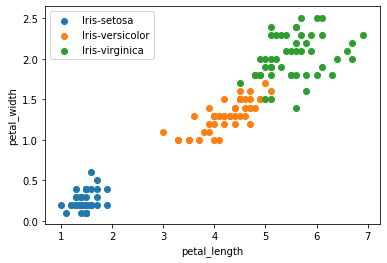

In [3]:
features = ['petal_length', 'petal_width']
classes = data['class'].unique()
data = data[[*features, 'class']]

for clazz in classes:
    curr_data = data[data['class'] == clazz]
    plt.scatter(curr_data[features[0]], curr_data[features[1]], label=clazz)
plt.xlabel(features[0])
plt.ylabel(features[1])
plt.legend()
plt.show()

iteration=5/20
No change in center, breaking early


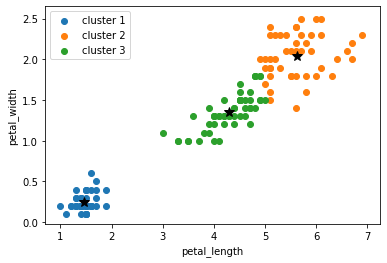

In [4]:
num_clusters = len(classes)
num_iters = 20

data_x = data[features].values

# randomly initialize center
# centers = []
# for i in range(num_clusters):
#     centers.append(
#         tuple(np.random.uniform(data_x[i].min(), 
#                                 data_x[i].max(), 
#                                 size=(1)).item() 
#               for i in range(len(features)))
#     )
centers = np.random.permutation(data_x)[:num_clusters]


# return data in datas assigned to each center in centers
def assign_clusters(centers, datas):
    clusters = [[] for _ in range(len(centers))]
    for data in datas:
        center_dists = []
        for center in centers:
            sqs = np.fromiter([np.square(d - c) for d, c in zip(data, center)], dtype='float')
            center_dists.append(np.sum(sqs))  
        clusters[np.argmin(center_dists)].append(data)
    return clusters

# training loop
for i in np.arange(1, num_iters+1):
    print(f'iteration={i}/{num_iters}', end='\r')
    clusters = assign_clusters(centers, data_x)
    new_centers = []
    for idx, cluster in enumerate(clusters):
        if len(cluster) == 0:
            # no data point assigned to this cluster
            # use the old center
            new_centers.append(centers[idx])
        else:
            new_centers.append(np.sum(cluster, axis=0) / len(cluster))
    if np.array_equal(new_centers, centers):  # no change in center, can break early
        print('\nNo change in center, breaking early')
        break
    centers = new_centers

# plot cluster, center and trace
clusters = assign_clusters(centers, data_x)
for i, cluster, center in zip(range(len(clusters)), clusters, centers):
    cluster = np.array(cluster)
    plt.plot([center[0]], [center[1]], marker='*', color='k', markersize=10)

    if len(cluster != 0):
        plt.scatter(cluster[:, 0], cluster[:, 1], label=f'cluster {i+1}')

plt.xlabel(features[0])
plt.ylabel(features[1])    
plt.legend()
plt.show()